# Data Prepocessing & Modelling

## Reading in Data, Cleaning Data and adding actual values for visualizations

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
# Import functions from own Python-File (see visuals.py in Repo)
import visuals as vs
from imblearn.over_sampling import RandomOverSampler


pd.set_option('display.max_columns', None) # To display all columns
import xlrd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
sns.set_style("whitegrid")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Modelling with Decision Tree, SVC, adaboost & balanced data 

We want to predict wether a certain person is suitable for our predefined drugclusters because of his personality traits.
Furthermore we focus on a high Precision because we do not want our model to predict the suitability for a wrong cluster of drugs, e.g. we do not want to offer chocolate to a crackhead or meth to a pothead.

Import Workfile:

In [2]:
wf = pd.read_csv('data/drug_workfile')
wf.head()

,Unnamed: 0,ID,Age,Age_Cat,Gender,Education,Education_Level,Country,Country_Name,Ethnicity,Ethnicity_Label,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Social_Drugs,Party_Drugs,Hard_Drugs
0,0,1,0.49788,35-44,1,-0.05921,Cert./Diploma,0.96082,UK,0.12600,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0
1,1,2,-0.07854,25-34,0,1.98437,PhD,0.96082,UK,-0.31685,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1
2,2,3,0.49788,35-44,0,-0.05921,Cert./Diploma,0.96082,UK,-0.31685,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
3,3,4,-0.95197,18-24,1,1.16365,Master,0.96082,UK,-0.31685,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,1
4,4,5,0.49788,35-44,1,1.98437,PhD,0.96082,UK,-0.31685,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,0


In [3]:
# TODO: Total number of participants
n_participants = len(wf)

# TODO: Number of records where participants's took drugs of "Social" class
n_participants_social = len(wf[wf['Party_Drugs'] == 1])

# TODO: Number of records where participants's took drugs of "Social" class
n_participants_nosocial = len(wf[wf['Party_Drugs'] == 0])

# TODO: Percentage of participants's who took drugs of "Social" class
greater_percent = 100 * n_participants_social / n_participants

#### Feature Selection:

In [4]:
# pd.crosstab(values=1, [wf.Party_Drugs, wf.Hard_Drugs])

In [5]:
# Checking for imbalanced data regarding our predicted Values:
wf['Party_Drugs'].value_counts(1)
wf['Hard_Drugs'].value_counts(1)

0    0.546617
1    0.453383
Name: Hard_Drugs, dtype: float64

In [6]:
X = wf[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]
y = wf['Party_Drugs']

Checking Correlation of selected features:

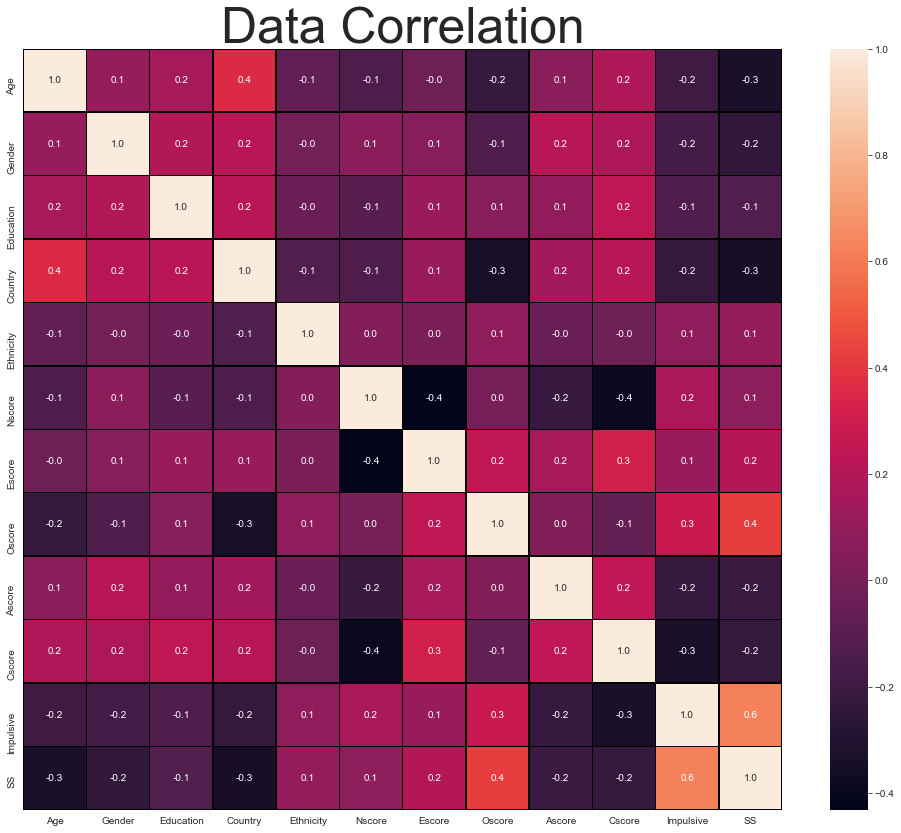

In [7]:
plt.subplots(figsize=(17,14))
sns.heatmap(X.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.1f")
plt.title("Data Correlation",fontsize=50)
plt.show()

In [8]:
# highest p-value is 0.6 for Impulsive/SS so no urgent need to get rid of that feature but we'll do for comparison:
X = wf[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive']]
y = wf['Party_Drugs']

In [9]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y) 

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1313 samples.
Testing set has 564 samples.


#### Random Oversampling

In [10]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1698 samples.
Testing set has 564 samples.


#### Naive Preditor

In [11]:
# TODO: Calculate accuracy
accuracy = n_participants_social / n_participants

# Calculating precision
precision = n_participants_social / (n_participants_social + n_participants_nosocial)

#Calculating recall (naive prediction because we assume there are no False Negatives)
recall = n_participants_social / (n_participants_social + 0)

# TODO: Calculate F-score using the formula above for beta = 0.5
fscore =  (1  + (0.5*0.5)) * ( precision * recall / (( 0.5*0.5 * (precision))+ recall))

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.6462, F-score: 0.6954]


In [12]:
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [13]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models, the random states are set to 420 so we know how to reproduce the model later
clf_A = DecisionTreeClassifier(random_state = 420)
clf_B = SVC(random_state = 420)
clf_C = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state = 420)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 17 samples.
DecisionTreeClassifier trained on 170 samples.
DecisionTreeClassifier trained on 1698 samples.
SVC trained on 17 samples.
SVC trained on 170 samples.
SVC trained on 1698 samples.
AdaBoostClassifier trained on 17 samples.
AdaBoostClassifier trained on 170 samples.
AdaBoostClassifier trained on 1698 samples.


/Users/sebastianrotten/neuefische/Personality_vs_drug_use/visuals.py:87: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


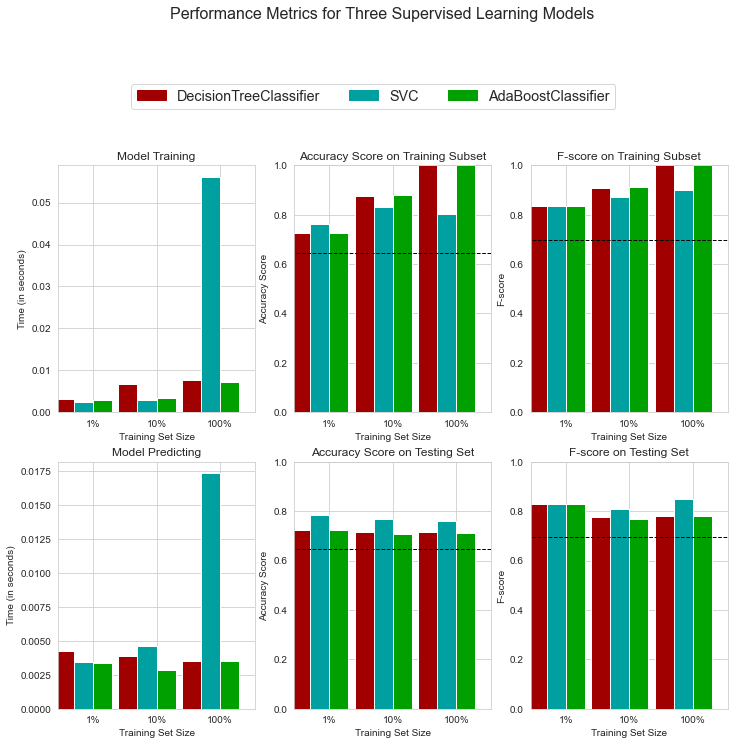

In [14]:
# Run metrics visualization for the two supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [15]:
#Printing out the values
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

DecisionTreeClassifier


,1%,10%,100%
train_time,0.003169,0.006741,0.007749
pred_time,0.004253,0.003910,0.003516
acc_train,0.726667,0.873333,1.000000
acc_test,0.723404,0.716312,0.716312
f_train,0.835351,0.905941,1.000000
f_test,0.828691,0.776231,0.779540


SVC


,1%,10%,100%
train_time,0.002357,0.002966,0.056107
pred_time,0.003408,0.004585,0.017294
acc_train,0.763333,0.830000,0.803333
acc_test,0.785461,0.769504,0.760638
f_train,0.835073,0.870841,0.898345
f_test,0.827128,0.810041,0.848446


AdaBoostClassifier


,1%,10%,100%
train_time,0.003041,0.003520,0.007222
pred_time,0.003373,0.002882,0.003529
acc_train,0.726667,0.880000,1.000000
acc_test,0.723404,0.705674,0.712766
f_train,0.835351,0.913174,1.000000
f_test,0.828691,0.768201,0.780201


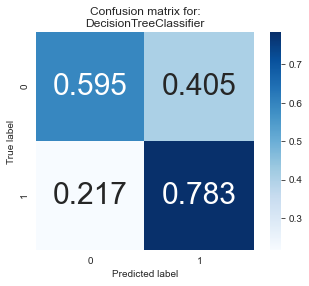

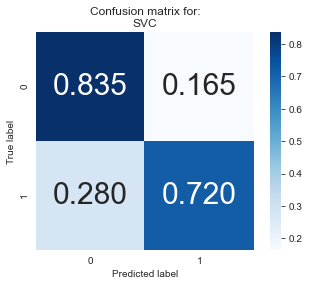

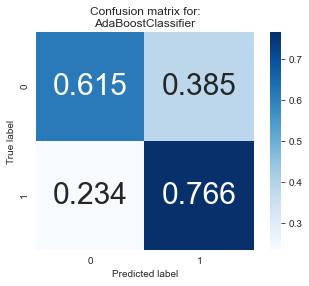

In [16]:
#Visualizing the confusion matrix for each classifier
from sklearn.metrics import confusion_matrix

for i,model in enumerate([clf_A,clf_B,clf_C]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

Looking at the results above, out of the three models, AdaBoost is the most appropriate for our task.

First and foremost, it is the classifier that performs the best on the testing data, in terms of both the accuracy and f0.5-score which we already weighted towards a higher importance regarding precision. It also takes reasonably low time to train on the full dataset, even if there are no big timing differences to our 2nd best model (Adaboost).

## Gridsearch for SVC

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'kernel': ['rbf', 'sigmoid'], 
               'gamma': [0.1, 1, 2, 5, 10],
               'C': [1, 5, 10, 15, 20]},
              {'kernel': ['linear'], 
               'C': [1, 5, 10, 15, 20]}]

#param_grid = [{'kernel': ['rbf', 'sigmoid'], 
#               'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
#               'C': [1, 10, 100]},
#              {'kernel': ['linear'], 
#               'C': [1, 10, 100]}]

scorer = make_scorer(fbeta_score,beta=0.5) 

grid = GridSearchCV(clf_B, param_grid, scorer ,verbose=True, n_jobs=-1, return_train_score=True)

result = grid.fit(X_train, y_train)

# Get the estimator
best_clf = result.best_estimator_ 

# Make predictions using the optimized and model
best_predictions_svc = best_clf.predict(X_test) 

/Users/sebastianrotten/opt/anaconda3/envs/drugs/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass scoring=make_scorer(fbeta_score, beta=0.5) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 260 out of 275 | elapsed:    6.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:    6.9s finished


In [49]:
result.best_score_ # highest f_score for gridsearch, we defined f_score to be our optimization parameter in the "scorer"
best_predictions_svc_train = best_clf.predict(X_train)

In [50]:
# Make predictions using the unoptimized model
unoptimized_model = clf_B.fit(X_train, y_train) 
predictions_svc = unoptimized_model.predict(X_test)
predictions_svc_train = unoptimized_model.predict(X_train)

In [51]:
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions_svc)))
print("Accuracy score on train data: {:.4f}".format(accuracy_score(y_train, predictions_svc_train)))

print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions_svc, beta = 0.5)))
print("F-score on train data: {:.4f}".format(fbeta_score(y_train, predictions_svc_train, beta = 0.5)))

print("\nOptimized Model\n------")
print("Maximum F-Score of GridSearch is: {:.4f}".format(result.best_score_))

print("\nFinal accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_svc)))
print("Final accuracy score on the train data: {:.4f}".format(accuracy_score(y_train, best_predictions_svc_train)))

print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions_svc, beta = 0.5)))
print("Final F-score on the train data: {:.4f}".format(fbeta_score(y_train, best_predictions_svc_train, beta = 0.5)))


print(f'Final parameters for model are : {best_clf}')

#for i in ['mean_test_score', 'std_test_score']:
#    print(i," : ",grid.cv_results_[i])

Unoptimized model
------
Accuracy score on testing data: 0.7606
Accuracy score on train data: 0.8298
F-score on testing data: 0.8484
F-score on train data: 0.8485

Optimized Model
------
Maximum F-Score of GridSearch is: 0.8773

Final accuracy score on the testing data: 0.7411
Final accuracy score on the train data: 1.0000
Final F-score on the testing data: 0.7745
Final F-score on the train data: 1.0000
Final parameters for model are : SVC(C=10, gamma=1, random_state=420)


## Grid Search for AdaBoost

In [18]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer 


# TODO: Create the parameters list you wish to tune
parameters_ada = {'n_estimators':[60, 70, 80],                
              'learning_rate':[0.1, 0.01, 0.05],               
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),               
              'base_estimator__max_depth' : np.arange(1, 4, 1)              
             } 

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5) 

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf_C, parameters_ada, scorer, verbose=1, n_jobs=-1)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit_ada = grid_obj.fit(X_train,y_train) 

# Get the estimator
best_clf_ada = grid_fit_ada.best_estimator_

# Make predictions using the unoptimized and model
predictions_ada = (clf_C.fit(X_train, y_train)).predict(X_test)
best_predictions_ada = best_clf_ada.predict(X_test) 

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions_ada)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions_ada, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_ada)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions_ada, beta = 0.5)))
print(best_clf_ada)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Users/sebastianrotten/opt/anaconda3/envs/drugs/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass scoring=make_scorer(fbeta_score, beta=0.5) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   17.5s finished


Unoptimized model
------
Accuracy score on testing data: 0.7128
F-score on testing data: 0.7802

Optimized Model
------
Final accuracy score on the testing data: 0.7411
Final F-score on the testing data: 0.8200
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         min_samples_split=6),
                   learning_rate=0.1, n_estimators=80, random_state=420)


## Feature Importance

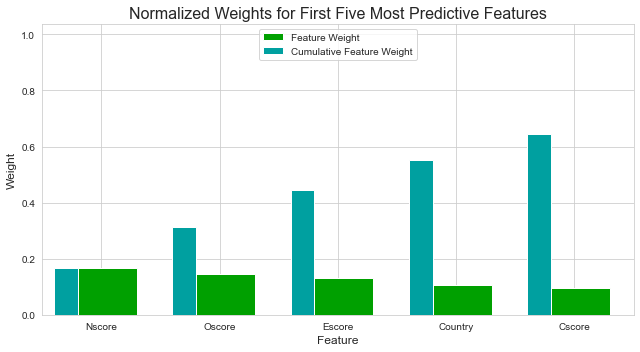

In [19]:
importances_ada = best_clf_ada.feature_importances_

# Plot
vs.feature_plot(importances_ada, X_train, y_train)

In [20]:
importances_ada

array([0.07256832, 0.03433245, 0.07908548, 0.10513779, 0.01421855,
       0.16709432, 0.13231035, 0.14641259, 0.09160999, 0.09493494,
       0.06229521])

In [52]:
importances_ada = best_clf.feature_importances_

# Plot
vs.feature_plot(importances_ada, X_train, y_train)

AttributeError: 'SVC' object has no attribute 'feature_importances_'